# Цель проекта:

Понять предпочтения пользователей, покупающих авиабилеты на те или иные направления.

## Изучим исходные данные:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from IPython.display import display

In [30]:
# Прочтём все данные и сохраним в переменные:
df_aircraft = pd.read_csv('/datasets/query_1.csv')
df_flights = pd.read_csv('/datasets/query_3.csv')

In [31]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df_aircraft.info()
df_aircraft.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Таблица df_aircraft содержит информацию о модели самолёта и количество рейсов, выполненных каждой моделью в сентябре 2018.

In [32]:
display(df_aircraft)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [33]:
# Используем метод info и describe чтобы изучить информацию по исходным данным:
df_flights.info()
df_flights.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [34]:
display(df_flights)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


### Вывод об исходных данных:

Исходные данные хорошего качества: отсутствуют пропуски в данных и у всех данных корректный тип.

## Исследовательский анализ данных:

In [35]:
# Отсортируем данные в таблице df_flights по среднему количеству рейсов в день.
df_flights_top10 = df_flights.sort_values('average_flights', ascending=False).head(10)
df_flights_top10['average_flights'] = df_flights_top10['average_flights'].round(2)
display(df_flights_top10)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


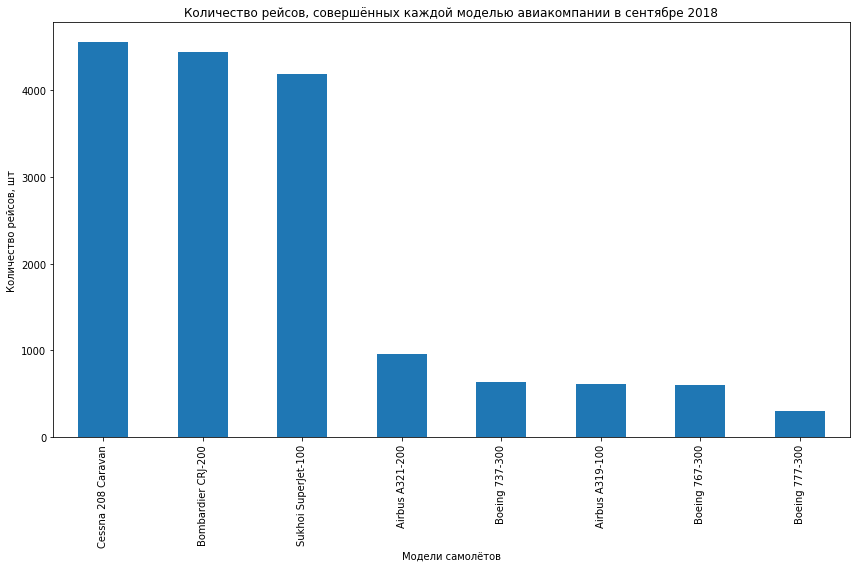

In [36]:
# Постороим график, чтобы наглядно увидеть распределение количества рейсов по моделям самолётов:
df_aircraft.sort_values('flights_amount', ascending=False).plot(
    x = 'model',
    y = 'flights_amount',
    kind = 'bar',
    figsize = (12, 8),
    title = 'Количество рейсов, совершённых каждой моделью авиакомпании в сентябре 2018',
    legend = None
)
plt.xlabel('Модели самолётов')
plt.ylabel('Количество рейсов, шт')
plt.tight_layout()

#### Вывод по моделям самолётов, совершающих больше всего рейсов:

Больше всего рейсов совершили самолёты небольших размеров - Cessna 208, Bombardier и SuperJet, которые используются для региональных перевозок.

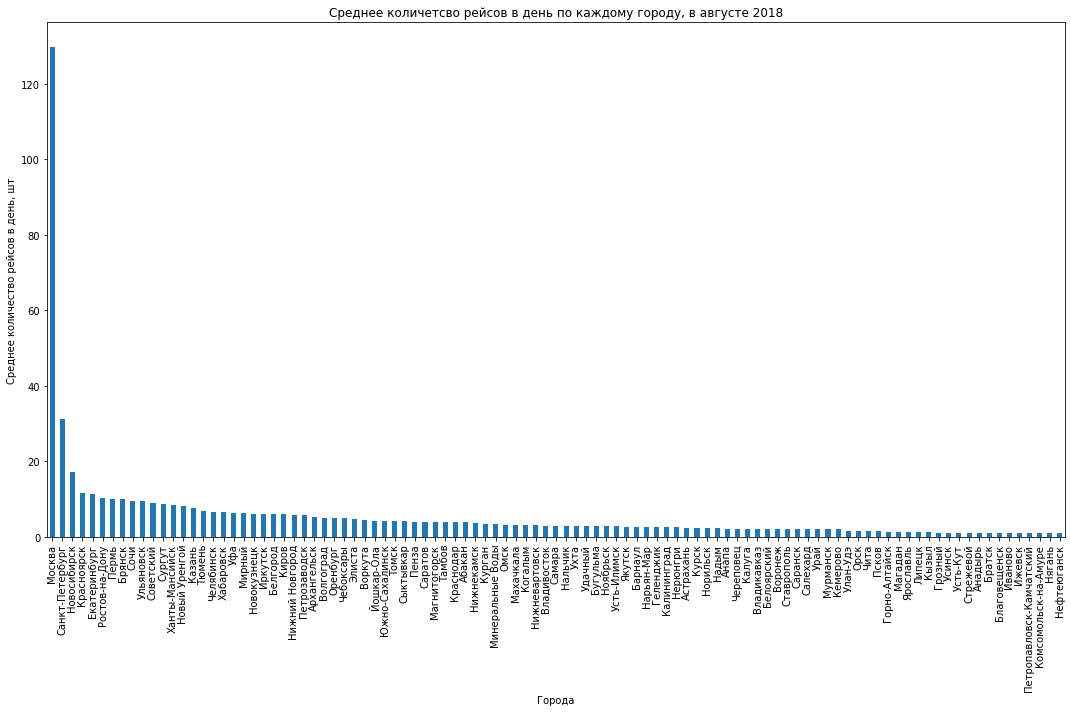

In [37]:
# Постороим график, чтобы наглядно увидеть распределение среднего количества рейсов в день по городам:
df_flights.sort_values('average_flights', ascending=False).plot(
    x = 'city',
    y = 'average_flights',
    kind = 'bar',
    figsize = (15, 10),
    title = 'Среднее количетсво рейсов в день по каждому городу, в августе 2018',
    legend = None
)
plt.xlabel('Города')
plt.ylabel('Среднее количество рейсов в день, шт')
plt.tight_layout()

#### Вывод по городам, которые приняли больше всего рейсов:

Москва - безоговорочный лидер среди городов, принявших рейсы авиакомпании. Что не удивительно, ведь Москва - крупнейший транспортный узел Европы.

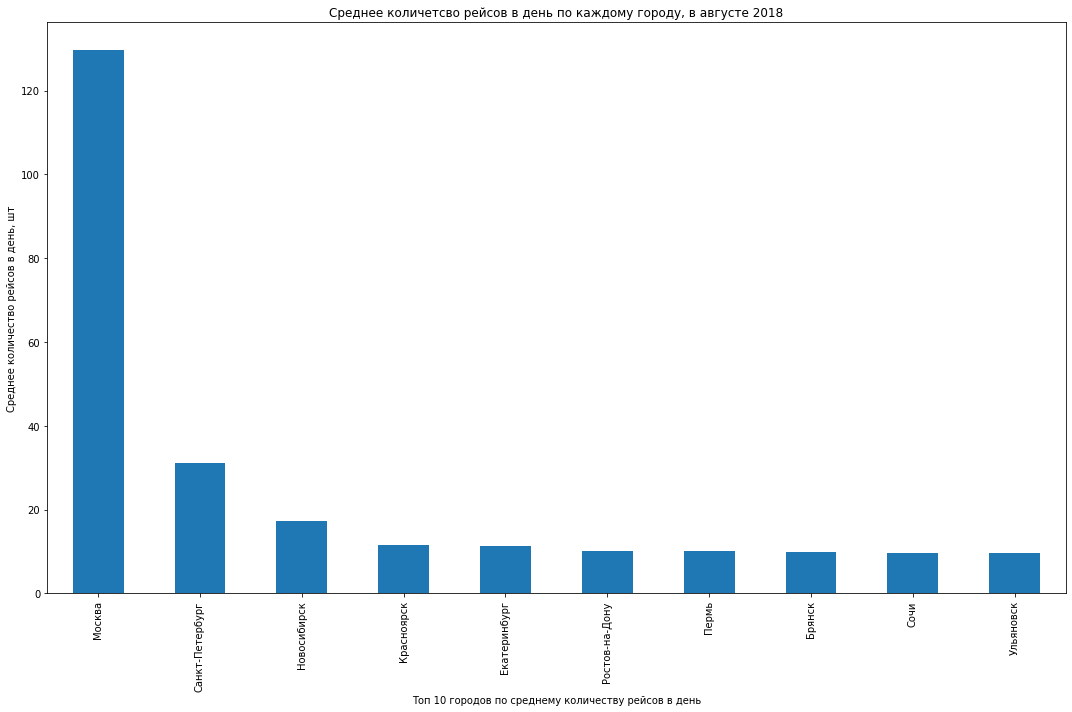

In [38]:
# Постороим график, чтобы наглядно увидеть распределение среднего количества рейсов в день по городам первой десятки:
df_flights_top10.plot(
    x = 'city',
    y = 'average_flights',
    kind = 'bar',
    figsize = (15, 10),
    title = 'Среднее количетсво рейсов в день по каждому городу, в августе 2018',
    legend = None
)
plt.xlabel('Топ 10 городов по среднему количеству рейсов в день')
plt.ylabel('Среднее количество рейсов в день, шт')
plt.tight_layout()

#### Вывод: по 10ти крупнейшим городам, которые приняли больше всего рейсов:

Москва - бесспорный лидер по количетсву рейсов. Москва столица и здесь находится сразу 4 гражданских аэропорта. К тому же, большинство пересадочных рейсов осуществляется через Москву. На 2ом и 3м месте расположились города, следующие сразу за Москвой по количеству началения: Санкт-Петербург и Москва. Остальные города, которые расположились с 4го по 10 место, принимают одинаковое количество, в среднем, рейсов в день.

## Итоговый вывод:

Лидерство среди моделей самолётов по количетсву рейсов захватили: Cessna 208, Bombardier и SuperJet. Объяняется это тем, что они относятся к региональным типам самолётов: имеют невысокую вместимость и летают на близкие расстояния. К тому же, SuperJet является российской разработкой и, возможно, получает субсидии за полёты, что стимулирует авиакомпанию его использовать чаще.
В лидерстве Москвы по среднему количеству рейсов в день нет ничего удивительного, так как Москва - огромный транспортный узел: 4 гражданских аэропорта, все основные пересадочные рейсы выполняются через Москву. Второе место Санкт-Петербурга так же ожидаемо, так как это второ по величине населения город в России.